### 1 - Where is the region of the county that most sales of houses are done? What is the medium price of the houses of this region?

To answer this first question, we need to take a look at the data first

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see there is a cloumn giving us the latitude and longitude of the houses, let's plot an histogram to take a look at latitude first:

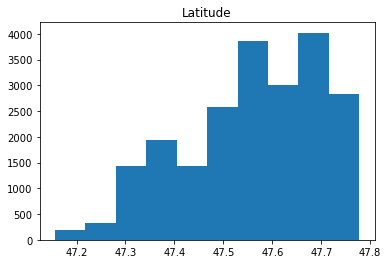

In [43]:
plt.hist(df['lat']);
plt.title('Latitude');

Humm... the bins are too big and it may be hindering something about the data, let's make the bins smaller and see what happens to the histogram

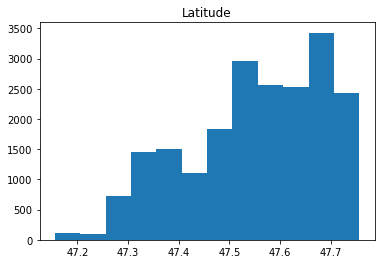

In [44]:
bins = np.arange(df['lat'].min(), df['lat'].max(), 0.05)
plt.hist(df['lat'], bins=bins);
plt.title('Latitude');

Humm.. let's make it even smaller...

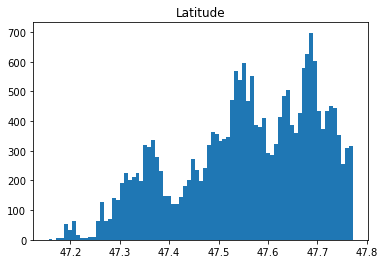

In [45]:
bins = np.arange(df['lat'].min(), df['lat'].max(), 0.008)
plt.hist(df['lat'], bins=bins);
plt.title('Latitude');

Now we see an interesting aspect of our data. It seems there are at least 3 different ranges where the data has an appearence similar to a normal distribution where the bigger two overlap, namely of ranges of:

        1 -> 47.25 ~ 47.41
        
        2 -> 47.41 ~ 47.61
        
        3 -> 47.61 ~ 47.77
        
The right side of the skew of the 3rd range seems to have been cut off, that is probably due to it being in the border of the studied county and it seems it may be very close to another city since there is a slight rise by the end of the histogram.

Now, let's take a look at the longitude

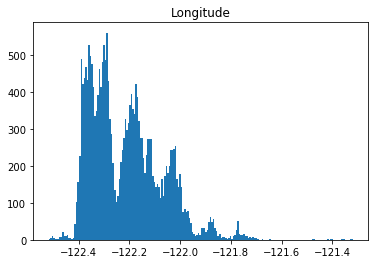

In [46]:
bins = np.arange(df['long'].min(), df['long'].max(), 0.006)
plt.hist(df['long'], bins=bins);
plt.title('Longitude');

Similarly to the pattern we see in the Latitude data, we can see 3 main regions where the selling of houses is concentrated.

Main ranges:


        1 -> -122.43 ~ -122.23
        
        2 -> -122.23 ~ -122.08
        
        3 -> -122.08 ~ -121.95
        
But since the peek is higher in the latitude histogram (around 700 in latitude in contrast with the 550 of longitude), it seems the sales are more distributed longitudinally than latitudinally. Is it true? Well, it may be due to the fact that our bin size was arbitrarly chosen, let's make it even then:

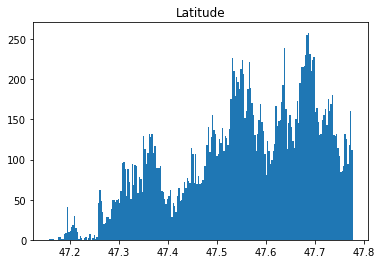

In [47]:
bins = np.arange(df['lat'].min(), df['lat'].max(), (df['lat'].max() - df['lat'].min())*100/df.shape[0]  )
plt.hist(df['lat'], bins=bins);
plt.title('Latitude');

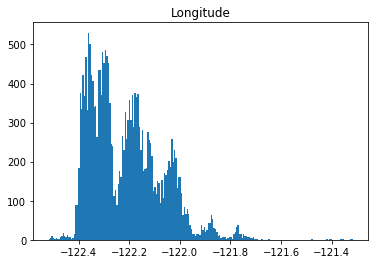

In [48]:
bins = np.arange(df['long'].min(), df['long'].max(), (df['long'].max() - df['long'].min())*100/df.shape[0]  )
plt.hist(df['long'], bins=bins);
plt.title('Longitude');

The bin size was made to be around 100 houses for both histograms. Now, we can clearly see that the opposite was true, the sales are more distributed latitudinally rather than longitudinally, which can say a lot about the positions of the main cities in the county. For instance, the main cities seem to be around the north and west of King County, more specifically, between latitudes of 47.61 ~ 47.77 and longitudes of -122.43 ~ -122.23.

To answer the mean price of this region, we just need to filter the data corresponding to this specific region.

In [53]:
df2 = df.query("lat > 47.61 and lat < 47.77 and long > -122.43 and long < -122.23")

In [59]:
df2.shape[0]/df.shape[0]

0.23758848840975338

In [57]:
df2.price.mean(), df.price.mean()

(640551.6079844206, 540088.1417665294)

As expected, the mean price of the most popular region is bigger than the mean price of all the county